In [0]:
# image classification neural network
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow.compat.v2 as tf
from tensorflow import keras

from os import listdir
import os
import cv2

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip -uq "/content/drive/My Drive/tensor_flow/natural-images.zip"

In [23]:
%cd/content/

/content


In [24]:
!ls

data  drive  natural_images  sample_data  X.pickle  y.pickle


In [0]:
INPUT_PATH = "/content/natural_images/"
categories = ["airplane","car" ,"cat" ,"dog" ,"flower" ,"fruit","motorbike","person"]

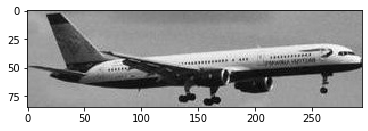

In [26]:
for category in categories:
  path = os.path.join(INPUT_PATH,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break



In [27]:
print(img_array.shape)

(85, 294)


In [0]:
# create train_data
image_size = 50
training_data = []
def create_train_data():
  for category in categories:
    path = os.path.join(INPUT_PATH,category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      img_size=50
      new_array = cv2.resize(img_array,(img_size,img_size))
      training_data.append([new_array,class_num])


create_train_data()

In [29]:
print(len(training_data))

6899


In [0]:
# shuffle the train_data
import random
random.shuffle(training_data)

In [0]:
# check labels if they're correct
for sample in training_data:
  print(sample[1])

In [0]:
# create feature and target sets
image_size=50
X = []
y = []
for feature,label in training_data:
  X.append(feature)
  y.append(label)

X = np.array(X).reshape(-1,image_size,image_size,1)

In [0]:
# save your data
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [0]:
# modeling

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import pickle

In [0]:
X = pickle.load(open("X.pickle",'rb'))
y = pickle.load(open('y.pickle','rb'))

In [17]:
X.shape

(6899, 50, 50, 1)

In [0]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

dummy_y = pd.DataFrame(dummy_y)
dummy_y = np.asfarray(dummy_y)

In [0]:
y_new = np.asfarray( dummy_y[:len(y)] )#.reshape(1,-5)

In [27]:
y_new.shape

(6899, 8)

In [30]:
X = X/255.0

model = Sequential()
model.add(Conv2D(50,(3,3),input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(25,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(5))

model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X,y_new, batch_size=32, validation_split=0.2)

Train on 5519 samples, validate on 1380 samples


InvalidArgumentError: ignored